In [3]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

import numpy as np
from sklearn.metrics import confusion_matrix
from keras.datasets import mnist

In [4]:
#obter os dados e já dividi-los em treinamento e teste
(X_treinamento, y_treinamento), (X_teste, y_teste) = mnist.load_data() 


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


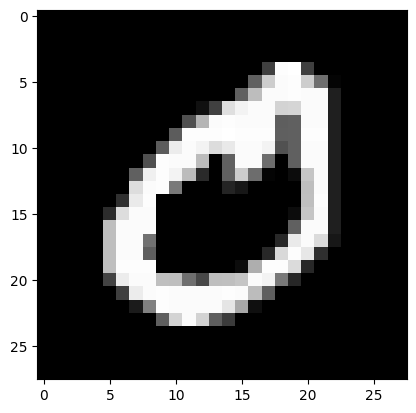

In [7]:
plt.imshow(X_treinamento[21], cmap='gray')